In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
continent_country_df = pd.read_csv('./billionaires.csv')
continent_country_df = continent_country_df[['country_of_residence', 'continent']].drop_duplicates()
continent_country_df.reset_index(drop=True, inplace=True)
# continent_country_df = continent_country_df.set_index('country_of_residence')
data = pd.read_csv('./billionaires2.csv')
data.rename(
    columns={ 'country': 'country_of_residence' },
    inplace=True
)
data = data.merge(continent_country_df, on='country_of_residence', how='left')
# data = data.dropna()
data.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country_of_residence                            38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

#### Đặc điểm tập dữ liệu
- Một số cột category của tập dữ liệu này có quá nhiều giá trị => phải gom lại thành other khi univariate category column
- Cột wealth phân phối lệch phải quá mạnh => không biết có phù hợp khi dùng anova hay không, hay t-test thì cho ra kết quả ntn?
- Tập dữ liệu có 2640 dòng
- Tách riêng bài toán tìm hiểu demography của các tỷ phú với tính hình kình tế của quốc gia của họ

#### Data dictionary

- rank: The ranking of the billionaire in terms of wealth.
- finalWorth: The final net worth of the billionaire in U.S. dollars.
- category: The category or industry in which the billionaire's business operates.
- personName: The full name of the billionaire.
- age: The age of the billionaire.
- country: The country in which the billionaire resides.
- city: The city in which the billionaire resides.
- source: The source of the billionaire's wealth.
- industries: The industries associated with the billionaire's business interests.
- countryOfCitizenship: The country of citizenship of the billionaire.
- organization: The name of the organization or company associated with the billionaire.
- selfMade: Indicates whether the billionaire is self-made (True/False).
- status: "D" represents self-made billionaires (Founders/Entrepreneurs) and "U" indicates inherited or unearned wealth.
- gender: The gender of the billionaire.
- birthDate: The birthdate of the billionaire.
- lastName: The last name of the billionaire.
- firstName: The first name of the billionaire.
- title: The title or honorific of the billionaire.
- date: The date of data collection.
- state: The state in which the billionaire resides.
- residenceStateRegion: The region or state of residence of the billionaire.
- birthYear: The birth year of the billionaire.
- birthMonth: The birth month of the billionaire.
- birthDay: The birth day of the billionaire.
- cpi_country: Consumer Price Index (CPI) for the billionaire's country.
- cpi_change_country: CPI change for the billionaire's country.
- gdp_country: Gross Domestic Product (GDP) for the billionaire's country.
- gross_tertiary_education_enrollment: Enrollment in tertiary education in the billionaire's country.
- gross_primary_education_enrollment_country: Enrollment in primary education in the billionaire's country.
- life_expectancy_country: Life expectancy in the billionaire's country.
- tax_revenue_country_country: Tax revenue in the billionaire's country.
- total_tax_rate_country: Total tax rate in the billionaire's country.
- population_country: Population of the billionaire's country.
- latitude_country: Latitude coordinate of the billionaire's country.
- longitude_country: Longitude coordinate of the billionaire's country.
<br><br>

- **Wealth distribution analysis: Explore the distribution of billionaires' wealth across different industries, countries, and regions.**
- **Demographic analysis: Investigate the age, gender, and birthplace demographics of billionaires.**
- Self-made vs. inherited wealth: Analyze the proportion of self-made billionaires and those who inherited their wealth.
- Economic indicators: Study correlations between billionaire wealth and economic indicators such as GDP, CPI, and tax rates.
- Geospatial analysis: Visualize the geographical distribution of billionaires and their wealth on a map. (similar to first one)
- Trends over time: Track changes in billionaire demographics and wealth over the years. (no data)

#### Preprocessing

In [136]:
data.rename({
    'Name': 'name',
    'Age': 'age',
    'finalWorth': 'net_worth',
    'personName': 'full_name',
    'country': 'country_of_residence',
    'city': 'city_of_residence',
    'countryOfCitizenship': 'citizenship',
    'selfMade': 'self_made',    
}, inplace=True, axis=1)
#data.info()
data.head()

,rank,net_worth,category,full_name,age,country_of_residence,city_of_residence,source,industries,citizenship,...,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,continent
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,Europe
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,North America
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,North America
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,North America
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,North America


In [137]:
data.isnull().sum()


rank                                             0
net_worth                                        0
category                                         0
full_name                                        0
age                                             65
country_of_residence                            38
city_of_residence                               72
source                                           0
industries                                       0
citizenship                                      0
organization                                  2315
self_made                                        0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [138]:
# remove life_expectancy_country & population_country because it is not related to our problem trying to solve here
cols_keeping = [
    'rank', 'full_name', 'age',  'gender', 'net_worth', 'industries',  
    'city_of_residence', 'country_of_residence', 'continent', 'organization', 'self_made']

data['self_made'] = data['self_made'].map({True: 'self-made', False: 'inherited'})
#how to have continent
data = data[cols_keeping]
data.head()

,rank,full_name,age,gender,net_worth,industries,city_of_residence,country_of_residence,continent,organization,self_made
0,1,Bernard Arnault & family,74.0,M,211000,Fashion & Retail,Paris,France,Europe,LVMH Moët Hennessy Louis Vuitton,inherited
1,2,Elon Musk,51.0,M,180000,Automotive,Austin,United States,North America,Tesla,self-made
2,3,Jeff Bezos,59.0,M,114000,Technology,Medina,United States,North America,Amazon,self-made
3,4,Larry Ellison,78.0,M,107000,Technology,Lanai,United States,North America,Oracle,self-made
4,5,Warren Buffett,92.0,M,106000,Finance & Investments,Omaha,United States,North America,Berkshire Hathaway Inc. (Cl A),self-made


#### Define functions

In [139]:
class PlotType(enumerate):
    HIST = 'hist'
    PIE = 'pie'
    BAR = 'bar'

def cat_univariate_analysis(data:pd.DataFrame, fig_size=(10, 5), exclude_cols=[], num_cols=3, plot_type=PlotType.HIST):
    i = 0
    category_cols = [col for col in data.columns if data[col].dtype == 'object']
    num_rows = len(category_cols) // num_cols + 1
    fig = plt.figure(figsize=fig_size)
    for col in category_cols:
        if col in exclude_cols:
            continue
        i += 1
        fig.add_subplot(num_rows, num_cols, i)
        if plot_type == PlotType.HIST:
            sns.histplot(data[col])
        elif plot_type == PlotType.PIE:
            plt.pie(data[col].value_counts(), labels=data[col].value_counts().index, autopct='%1.1f%%')
        elif plot_type == PlotType.BAR:
            sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts())
        plt.xticks(rotation=90)
        plt.title(col)
    plt.tight_layout()
    plt.show()

In [140]:
from scipy.stats import chi2_contingency, chi2
def plot_crosstab_and_show_dependency(df, col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.plot(kind='bar', stacked=True, figsize=(5, 5))
    plt.title(f'{col1} vs {col2}')
    plt.show()

    stat, p, dof, expected =chi2_contingency(crosstab)
    print(f'p-value: {p}')
    print(f'dof: {dof}')

    prob = 0.975
    critical = chi2.ppf(prob, dof)
    print(f'probability: {prob}, critical: {critical}, stat: {stat}')

    alpha = 1 - prob
    print(f'alpha (significant): {alpha}, p-value: {p}')
    if p <= alpha:
        print(f'{col1} dependent {col2} (reject H0)')
    else:
        print(f'{col1} independent {col2}(fail to reject H0)')

In [141]:
def num_univariate_analysis(data, col: str):
    #Descriptive statistics
    print(data[col].describe(include='all'))
    col_median = data[col].median()
    col_mode = data[col].mode().iloc[0]
    col_range = data[col].max() - data[col].min()
    col_variance = data[col].var()
    col_skew = data[col].skew()
    col_kurt = data[col].kurt()

    print(f"Median {col_median}")
    print(f"Mode {col_mode}")
    print(f"Range {col_range}")
    print(f"Var {col_variance}")
    print("****************************************************")

    # Histogram
    plt.figure(figsize=(8, 5))
    plt.subplot(1, 3, 1)
    sns.histplot(data[col], kde=True)
    plt.subplot(1, 3, 2)
    plt.hist(data[col])
    plt.subplot(1, 3, 3)
    plt.pie(data[col].value_counts(), labels=data[col].value_counts().index, autopct='%1.1f%%')
    plt.show()
    print(f"Skew {col_skew}")
    print(f"Kurt {col_kurt}")
    if col_skew > 0:
        print("Phân phối lệch phải")
    else:
        print("Phân phối lệch trái")
    
    if col_kurt > 0:
        print("Phân phối nhọn hơn phân phối chuẩn")
    else:
        print("Phân phối có độ nhọn thấp hơn phân phối chuẩn")
    print("****************************************************")

    col_Q1 = data[col].quantile(0.25)
    col_Q3 = data[col].quantile(0.75)
    col_IQR = col_Q3 - col_Q1
    print(f"Q1 - Q3: {col_Q1} - {col_Q3}")
    print(f"IQR {col_IQR}")

    # Boxplot, Outliers
    plt.figure(figsize=(2,2))
    plt.boxplot(data[col])
    plt.show()
    col_outliers_upper_num = data[data[col] > (col_Q3 + 1.5*col_IQR)].shape[0]
    col_outliers_lower_num = data[data[col] < (col_Q1 - 1.5*col_IQR)].shape[0]
    col_outliers_per = (col_outliers_upper_num + col_outliers_lower_num)/data.shape[0] * 100
    print(f"Number of outliers: {col_outliers_upper_num + col_outliers_lower_num}")
    print(f'Upper outliers: {(col_Q3 + 1.5*col_IQR)}')
    print(f'Lower outliers: {(col_Q1 - 1.5*col_IQR)}')
    print(f"Number of upper outliers: {col_outliers_upper_num}")
    print(f"Number of lower outliers: {col_outliers_lower_num}")
    print(f"Percentage of outliers: {col_outliers_per}%")
    # vì outlier có tỉ lệ nhỏ (<1%) nên có thể không cần loại bỏ outlier

#### EDA

In [142]:
category_cols = [col for col in data.columns if data[col].dtype == 'object']
for col in category_cols:
    if col not in ['full_name', 'city_of_residence', 'organization']:
        print(f'{col} have {data[col].nunique()} unique values: {data[col].unique()}')

gender have 2 unique values: ['M' 'F']
industries have 18 unique values: ['Fashion & Retail' 'Automotive' 'Technology' 'Finance & Investments'
 'Media & Entertainment' 'Telecom' 'Diversified' 'Food & Beverage'
 'Logistics' 'Gambling & Casinos' 'Manufacturing' 'Real Estate'
 'Metals & Mining' 'Energy' 'Healthcare' 'Service'
 'Construction & Engineering' 'Sports']
country_of_residence have 78 unique values: ['France' 'United States' 'Mexico' 'India' 'Spain' 'China' 'Canada'
 'Germany' 'Switzerland' 'Belgium' 'Hong Kong' 'Austria' 'Japan'
 'United Kingdom' 'Australia' 'Indonesia' 'United Arab Emirates' 'Russia'
 'Chile' 'Monaco' 'Czech Republic' 'Sweden' nan 'Thailand' 'Uzbekistan'
 'Singapore' 'Nigeria' 'Israel' 'Italy' 'South Africa' 'Brazil' 'Malaysia'
 'South Korea' 'New Zealand' 'Philippines' 'Taiwan' 'Norway' 'Egypt'
 'Denmark' 'Eswatini (Swaziland)' 'Colombia' 'Netherlands' 'Poland'
 'Bahamas' 'Ukraine' 'Cayman Islands' 'Greece' 'Turkey' 'Argentina'
 'Georgia' 'Portugal' 'Kazakhsta

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 0 to 2639
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2640 non-null   int64  
 1   full_name             2640 non-null   object 
 2   age                   2575 non-null   float64
 3   gender                2640 non-null   object 
 4   net_worth             2640 non-null   int64  
 5   industries            2640 non-null   object 
 6   city_of_residence     2568 non-null   object 
 7   country_of_residence  2602 non-null   object 
 8   continent             2602 non-null   object 
 9   organization          325 non-null    object 
 10  self_made             2640 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 247.5+ KB


#### Number Univariate Analysis

In [144]:
# num_univariate_analysis(data, 'net_worth')
# num_univariate_analysis(data, 'age')

Lọc ngoại lại => net worth vẫn lệch phải mạnh, như trước khi lọc ngoại lai => kể cả trong danh sách những người siêu giàu, luôn chỉ có một số nhỏ người siêu siêu giàu

8250.0
count    2392.000000
mean     2729.891304
std      1719.917126
min      1000.000000
25%      1400.000000
50%      2100.000000
75%      3500.000000
max      8200.000000
Name: net_worth, dtype: float64
Median 2100.0
Mode 1200
Range 7200
Var 2958114.919171531
****************************************************


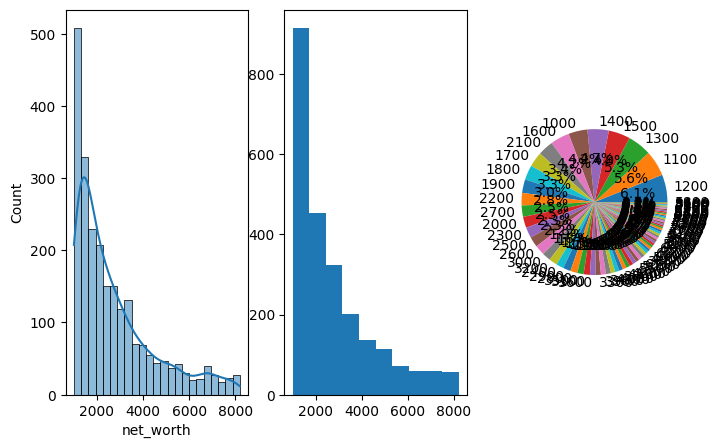

Skew 1.3366580812730322
Kurt 1.0576267849075087
Phân phối lệch phải
Phân phối nhọn hơn phân phối chuẩn
****************************************************
Q1 - Q3: 1400.0 - 3500.0
IQR 2100.0


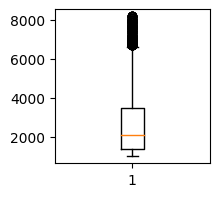

Number of outliers: 134
Upper outliers: 6650.0
Lower outliers: -1750.0
Number of upper outliers: 134
Number of lower outliers: 0
Percentage of outliers: 5.60200668896321%


In [145]:
#remove outlier
q3 = data['net_worth'].quantile(0.75)
iqr = data['net_worth'].quantile(0.75) - data['net_worth'].quantile(0.25)
upper_bound = q3 + 1.5*iqr
print(upper_bound)
no_outliers = data[data['net_worth'] < upper_bound]
num_univariate_analysis(no_outliers, 'net_worth')

Số lượng ngoại lai chiêm 10% => và khi lọc ngoại lai xong thì phân phối cũng không đổi nhiều => ta không nên lọc ngoại lai trừ khi nó liên qua tới việc phân tích

#### Category Univariate Analysis
- Ngoài others chiếm 17.8%
- Đầu từ kinh doanh chiếm 14.1%
- Sản xuất chiếm 12.3%
- Công nghệ chiêm 12%
- Thời trang và bán lẻ chiếm 10% (dịch vụ)
- Thực phẩm và ăn uống chiếm 8% (dịch vụ nhà hàng khách sạn)
- Đa ngành chiếm 7.3% 
- Bất động sản chiếm 7.1%

- Tỷ phú nam chiếm 87.2%, tỷ phú nữ chiếm 12.8%, 69% là self-made, 31% là inherit
- Số tỷ phú ở Châu Á 41%, Bắc Mỹ 31%, 23% là Châu Âu
- Tổng giá trị đóng góp ở Châu Á 32%, Bắc Mỹ 41%, 24% là Châu Âu

In [146]:
category_cols = [col for col in data.columns if data[col].dtype == 'object']
for col in category_cols:
    if col not in ['full_name', 'city_of_residence', 'organization']:
        print(f'{col} have {data[col].nunique()} unique values: {data[col].unique()}')

gender have 2 unique values: ['M' 'F']
industries have 18 unique values: ['Fashion & Retail' 'Automotive' 'Technology' 'Finance & Investments'
 'Media & Entertainment' 'Telecom' 'Diversified' 'Food & Beverage'
 'Logistics' 'Gambling & Casinos' 'Manufacturing' 'Real Estate'
 'Metals & Mining' 'Energy' 'Healthcare' 'Service'
 'Construction & Engineering' 'Sports']
country_of_residence have 78 unique values: ['France' 'United States' 'Mexico' 'India' 'Spain' 'China' 'Canada'
 'Germany' 'Switzerland' 'Belgium' 'Hong Kong' 'Austria' 'Japan'
 'United Kingdom' 'Australia' 'Indonesia' 'United Arab Emirates' 'Russia'
 'Chile' 'Monaco' 'Czech Republic' 'Sweden' nan 'Thailand' 'Uzbekistan'
 'Singapore' 'Nigeria' 'Israel' 'Italy' 'South Africa' 'Brazil' 'Malaysia'
 'South Korea' 'New Zealand' 'Philippines' 'Taiwan' 'Norway' 'Egypt'
 'Denmark' 'Eswatini (Swaziland)' 'Colombia' 'Netherlands' 'Poland'
 'Bahamas' 'Ukraine' 'Cayman Islands' 'Greece' 'Turkey' 'Argentina'
 'Georgia' 'Portugal' 'Kazakhsta

                    industries  count  percentage
11       Media & Entertainment     91    3.446970
12             Metals & Mining     74    2.803030
0                   Automotive     73    2.765152
14                     Service     53    2.007576
1   Construction & Engineering     45    1.704545
9                    Logistics     40    1.515152
15                      Sports     39    1.477273
17                     Telecom     31    1.174242
7           Gambling & Casinos     25    0.946970


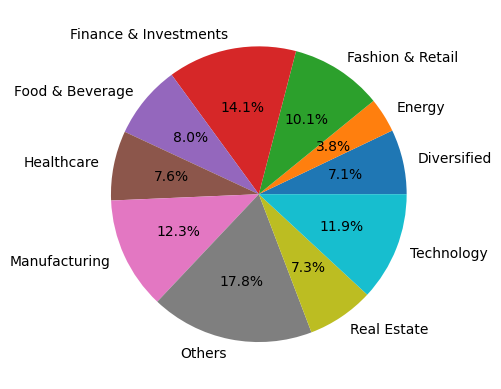

In [147]:
# top 8 industry and others databuff
data_buff = data.groupby('industries').size().reset_index()
data_buff.columns = ['industries', 'count']
data_buff = data_buff.sort_values(by='count', ascending=False)
data_buff['percentage'] = data_buff['count']/data_buff['count'].sum() * 100
print(data_buff.tail(9))

# convert the the industry with less than 100 people to 'Others'
data_buff.loc[data_buff['count'] < 100, 'industries'] = 'Others'
data_buff = data_buff.groupby('industries').sum().reset_index()

plt.pie(data_buff['count'], labels=data_buff['industries'], autopct='%1.1f%%')
plt.show()

   country_of_residence  count  percentage
74        United States    754   28.977709
16                China    523   20.099923
31                India    157    6.033820
26              Germany    102    3.920061
73       United Kingdom     82    3.151422
58               Russia     79    3.036126
65          Switzerland     78    2.997694
29            Hong Kong     68    2.613374
35                Italy     55    2.113759
********************************************
After convert to others
  country_of_residence  count  percentage
0                China    523   20.099923
1              Germany    102    3.920061
2            Hong Kong     68    2.613374
3                India    157    6.033820
4                Italy     55    2.113759
5               Others    704   27.056111
6               Russia     79    3.036126
7          Switzerland     78    2.997694
8       United Kingdom     82    3.151422
9        United States    754   28.977709


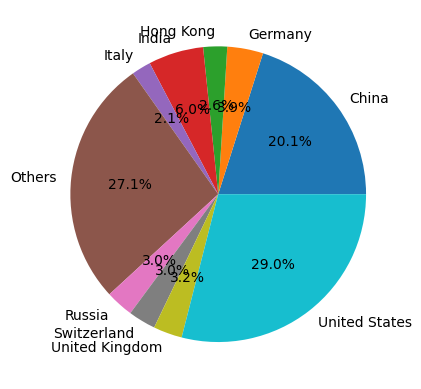

In [148]:
# top 8 industry and others databuff
data_buff = data.groupby('country_of_residence').size().reset_index()
data_buff.columns = ['country_of_residence', 'count']
data_buff = data_buff.sort_values(by='count', ascending=False)
data_buff['percentage'] = data_buff['count']/data_buff['count'].sum() * 100

print(data_buff.head(9))
print('********************************************')
print("After convert to others")
# convert the the industry with less than 55 people to 'Others'
data_buff.loc[data_buff['count'] < 55, 'country_of_residence'] = 'Others'
data_buff = data_buff.groupby('country_of_residence').sum().reset_index()
print(data_buff)
plt.pie(data_buff['count'], labels=data_buff['country_of_residence'], autopct='%1.1f%%')
plt.show()

,continent,sum_net_worth,percentage
3,North America,4943800,40.807601
1,Asia,3837200,31.673394
2,Europe,2904400,23.973784
4,Oceania,183600,1.515489
5,South America,162900,1.344625
0,Africa,83000,0.685107


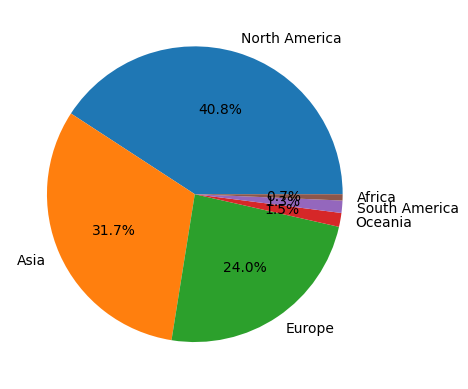

In [176]:
# top 8 industry and others databuff
data_buff = data.groupby('continent')['net_worth'].sum().reset_index()
data_buff.columns = ['continent', 'sum_net_worth']
data_buff = data_buff.sort_values(by='sum_net_worth', ascending=False)
plt.pie(data_buff['sum_net_worth'], labels=data_buff['continent'], autopct='%1.1f%%')
data_buff['percentage'] = data_buff['sum_net_worth']/data_buff['sum_net_worth'].sum() * 100
data_buff

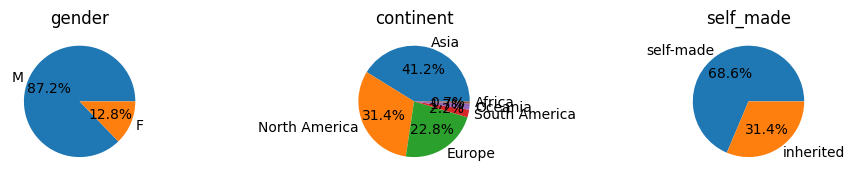

In [149]:
cat_univariate_analysis(data, exclude_cols=['full_name', 'city_of_residence', 'organization', 'country_of_residence', 'industries'], num_cols=3, plot_type=PlotType.PIE)

#### Number Multivariate Analysis

In [172]:
data.corr()

C:\Users\PC\AppData\Local\Temp\ipykernel_22860\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,rank,age,net_worth
rank,1.000000,-0.142686,-0.448930
age,-0.142686,1.000000,0.067053
net_worth,-0.448930,0.067053,1.000000


#### Category Multivariate Analysis
<pre>
Nhưng tỉ lệ self made billionaire thay đổi tùy quốc gia, tùy lĩnh vực
Đây là những ngành mà tỉ lệ inherit cao (các ngành dịch vụ, thời trang, xây dựng)
Diversified                       104         83             55.614973
Construction & Engineering         22         23             48.888889
Food & Beverage                   103        109             48.584906
Automotive                         34         39             46.575342
Service                            23         30             43.396226
Fashion & Retail                  107        159             40.225564
Sports                             14         25             35.897436
</pre>

Ở nam mỹ, châu Phi, châu âu, tỉ trọng tỷ phú không tự thân hay COCC rất cao

gender                         F      M  percentage_F
industries                                           
Food & Beverage             45.0  167.0     21.226415
Service                      9.0   44.0     16.981132
Gambling & Casinos           4.0   21.0     16.000000
Diversified                 29.0  158.0     15.508021
Sports                       6.0   33.0     15.384615
Logistics                    6.0   34.0     15.000000
Fashion & Retail            39.0  227.0     14.661654
Healthcare                  28.0  173.0     13.930348
Manufacturing               45.0  279.0     13.888889
Construction & Engineering   6.0   39.0     13.333333
Media & Entertainment       12.0   79.0     13.186813
Metals & Mining              9.0   65.0     12.162162
Real Estate                 22.0  171.0     11.398964
Energy                      10.0   90.0     10.000000
Automotive                   7.0   66.0      9.589041
Technology                  30.0  284.0      9.554140
Finance & Investments       

<AxesSubplot: xlabel='industries'>

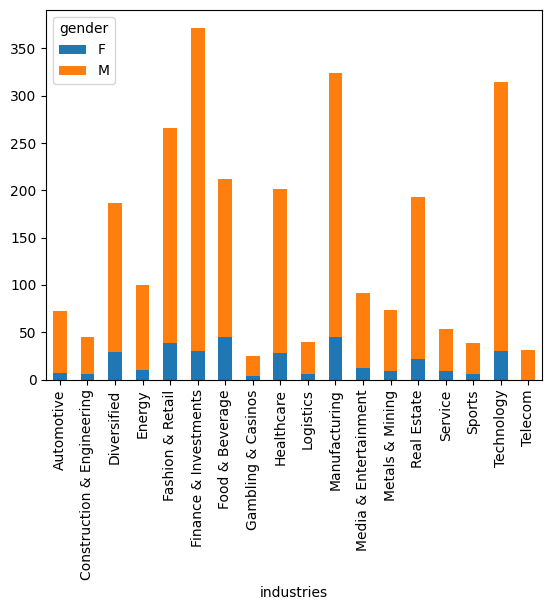

In [151]:
#pivot table to count number of male, female billionaires on industries
pivot_count_industry_gender = data.pivot_table(index='industries', columns='gender', values='full_name', aggfunc='count')
pivot_count_industry_gender_with_percentage = pivot_count_industry_gender.copy()
# we can only do this because the number of values of gender column is not much
pivot_count_industry_gender_with_percentage['percentage_F'] = pivot_count_industry_gender_with_percentage['F'] / (pivot_count_industry_gender_with_percentage['F'] + pivot_count_industry_gender_with_percentage['M']) * 100
print(pivot_count_industry_gender_with_percentage.sort_values(by='percentage_F', ascending=False))
pivot_count_industry_gender.plot(kind='bar', stacked=True)

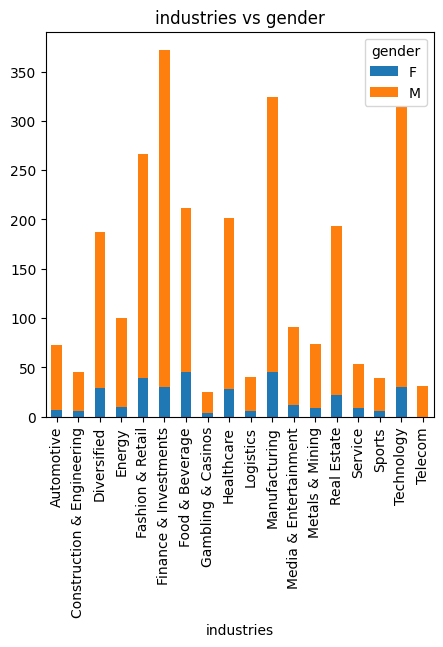

p-value: 0.007421490591949356
dof: 17
probability: 0.975, critical: 30.19100912163982, stat: 34.41365465000492
alpha (significant): 0.025000000000000022, p-value: 0.007421490591949356
industries dependent gender (reject H0)


In [152]:
plot_crosstab_and_show_dependency(data, 'industries','gender')

self_made                   inherited  self-made  percentage_inherited
industries                                                            
Diversified                       104         83             55.614973
Construction & Engineering         22         23             48.888889
Food & Beverage                   103        109             48.584906
Automotive                         34         39             46.575342
Service                            23         30             43.396226
Fashion & Retail                  107        159             40.225564
Sports                             14         25             35.897436
Real Estate                        62        131             32.124352
Media & Entertainment              27         64             29.670330
Metals & Mining                    21         53             28.378378
Logistics                          11         29             27.500000
Manufacturing                      89        235             27.469136
Health

<AxesSubplot: xlabel='industries'>

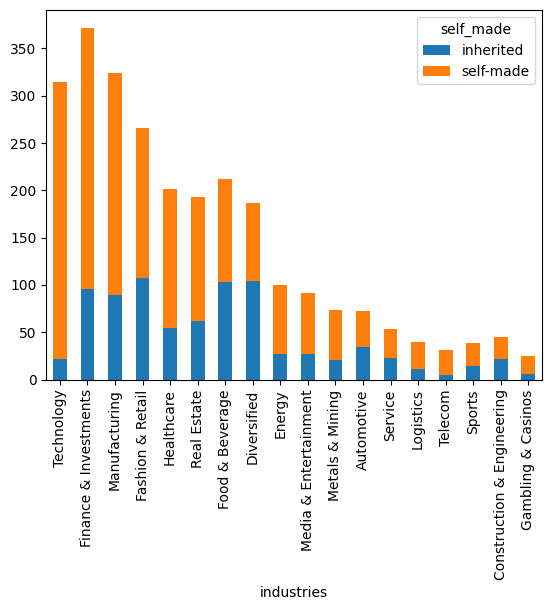

In [153]:
pivot_count_industry_self_made = data.pivot_table(index='industries', columns='self_made', values='full_name', aggfunc='count').sort_values(by='self-made', ascending=False)
pivot_count_industry_self_made_with_percentage = pivot_count_industry_self_made.copy()
pivot_count_industry_self_made_with_percentage['percentage_inherited'] = pivot_count_industry_self_made['inherited'] / (pivot_count_industry_self_made['self-made']  + pivot_count_industry_self_made['inherited']) * 100 #if inherited < self-made then p < 100
print(pivot_count_industry_self_made_with_percentage.sort_values(by='percentage_inherited', ascending=False))

pivot_count_industry_self_made.plot(kind='bar', stacked=True)

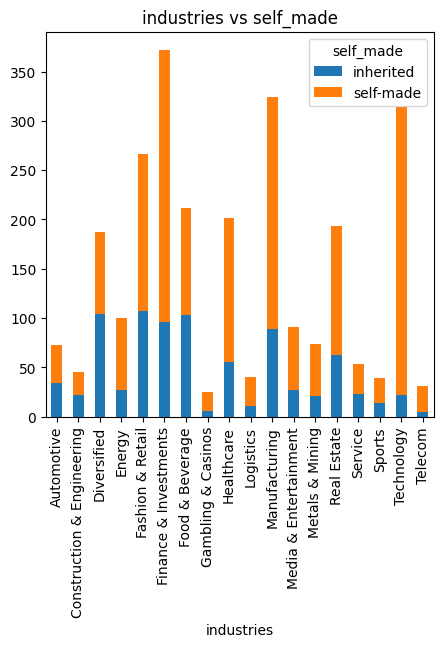

p-value: 3.544995315057233e-35
dof: 17
probability: 0.975, critical: 30.19100912163982, stat: 209.46989439318307
alpha (significant): 0.025000000000000022, p-value: 3.544995315057233e-35
industries dependent self_made (reject H0)


In [154]:
plot_crosstab_and_show_dependency(data, 'industries','self_made')

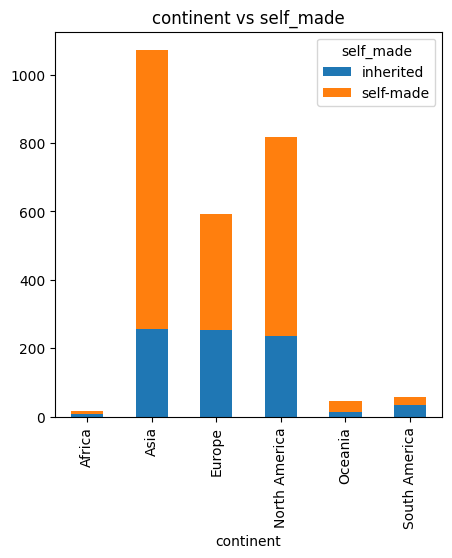

p-value: 5.0234908818634506e-17
dof: 5
probability: 0.975, critical: 12.832501994030027, stat: 85.8376938237806
alpha (significant): 0.025000000000000022, p-value: 5.0234908818634506e-17
continent dependent self_made (reject H0)


In [170]:
plot_crosstab_and_show_dependency(data, 'continent', 'self_made')

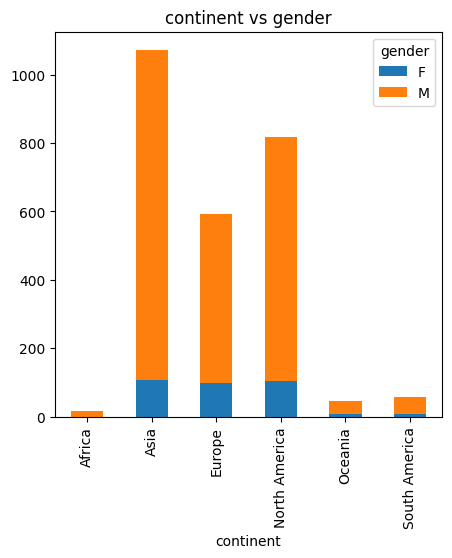

p-value: 0.0007622672022889132
dof: 5
probability: 0.975, critical: 12.832501994030027, stat: 21.139725745268514
alpha (significant): 0.025000000000000022, p-value: 0.0007622672022889132
continent dependent gender (reject H0)


In [171]:
plot_crosstab_and_show_dependency(data, 'continent', 'gender')

#### Percentage of networth the elite contribute to total
- 10 người giàu nhất chiếm 10% tổng của 2640 tỷ phú được ghi nhận
- 9.39% người giàu nhất chiếm 46.5% tổng giá trị của cải của các vị tỷ phú


In [155]:
elite = data[data['rank'] <= 10]
elite_net_worth = elite['net_worth'].sum()
p_elite_net_worth = elite_net_worth / data['net_worth'].sum() * 100
print(f'Elite net worth: {elite_net_worth} & percentage: {p_elite_net_worth}')

Elite net worth: 1173600 & percentage: 9.614313333551792


In [156]:
outliers = data[data['net_worth'] > upper_bound]
outliers_net_worth = outliers['net_worth'].sum()
count_outliers = outliers.shape[0]
p_outliers_net_worth = outliers_net_worth / data['net_worth'].sum() * 100
p_outliers_count = count_outliers / data.shape[0] * 100
print(f'Outliers net worth: {outliers_net_worth} & percentage: {p_outliers_net_worth}')
print(f'Outliers count: {count_outliers} & percentage: {p_outliers_count}')

Outliers net worth: 5676900 & percentage: 46.50604581053183
Outliers count: 248 & percentage: 9.393939393939393


#### Which industry have most billionaires
- Finance & Inverstments
- Manufaturing
- Technology
- Fashion & Retail
- Food & Beverage
- Healthcare
- Real Estate
- Diversified
- Energy
- Media & Entertainment

Khi lọc ngoại lại (những người siêu giàu trong số các tỷ phú), thứ tự số lượng billionaires các ngành vẫn không đổi

<AxesSubplot: >

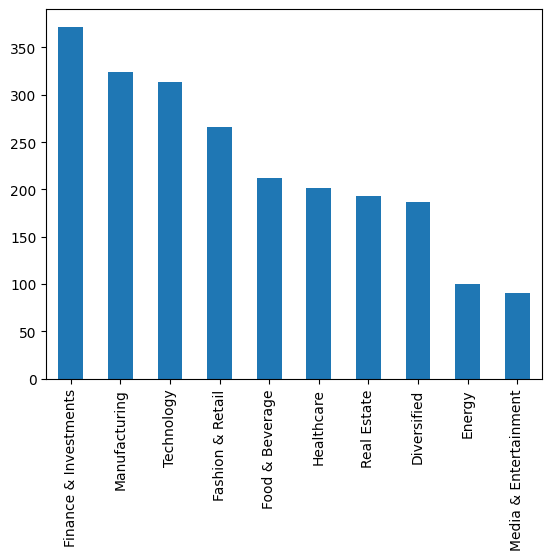

In [157]:
# top 10 industry sorted by number of billionaires
data['industries'].value_counts().head(10).plot(kind='bar')

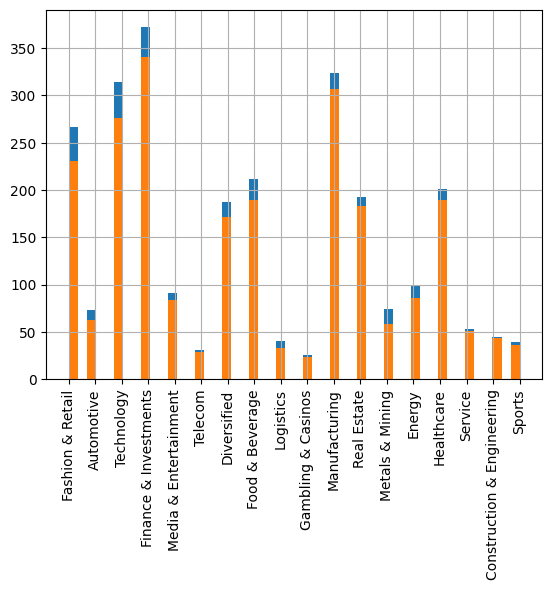

In [158]:
data['industries'].hist(bins=50)
no_outliers['industries'].hist(bins=50)
plt.xticks(rotation=90)
plt.show()

#### Top 10 industries gather most wealth
- Technology               1877900
- Fashion & Retail         1698800
- Finance & Investments    1605100
- Manufacturing            1019000
- Food & Beverage           957200
- Diversified               905200
- Real Estate               657400
- Healthcare                643200
- Automotive                525300
- Energy                    453500

industries
Technology               1877900
Fashion & Retail         1698800
Finance & Investments    1605100
Manufacturing            1019000
Food & Beverage           957200
Diversified               905200
Real Estate               657400
Healthcare                643200
Automotive                525300
Energy                    453500
Name: net_worth, dtype: int64

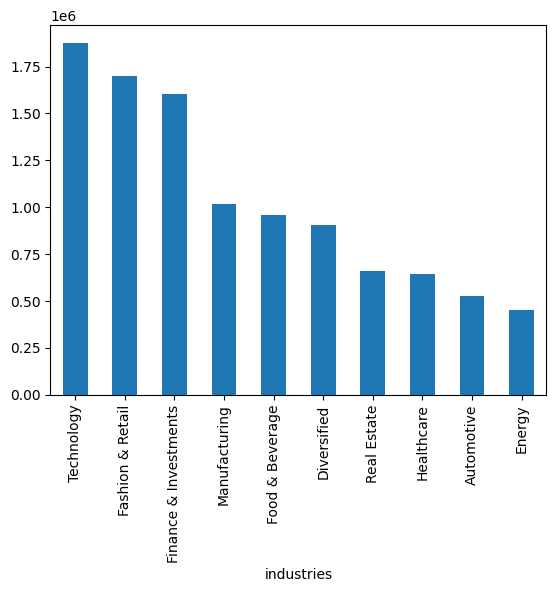

In [159]:
where = data.groupby('industries')['net_worth'].sum().sort_values(ascending=False).head(10)
where.plot(kind='bar')
where.head(10)

#### Median ,mode age of billionaires from each industry
- Tuổi của các tỷ phú thường là từ 68 - 71, riêng khối ngành về công nghệ, sản xuất ,xây dựng, khai khoáng, tuổi trung bình là từ 57 - 64
- Một vài quốc gia nam my, họ là tỷ phú khi tuổi khá cao 87 - 90
- Việt nam, trung quốc, Uc có tỷ phú từ khoảng 56.6 - 59 tuổi

,mean,median
industries,,
Sports,69.025641,71.0
Diversified,68.703297,68.5
Gambling & Casinos,68.520000,71.0
Logistics,68.179487,68.0
Real Estate,68.120419,69.0
Energy,67.824742,67.0
Service,67.773585,69.0
Fashion & Retail,66.783784,69.0
Telecom,66.677419,67.0


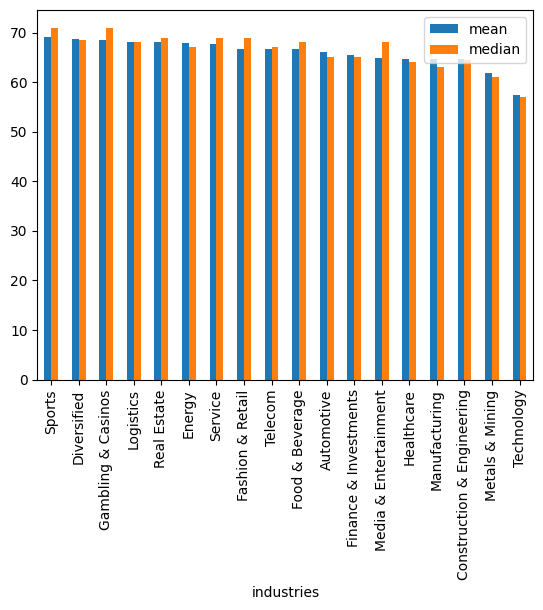

In [160]:
where = data.groupby('industries')['age'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)
where.plot(kind='bar')
where

,mean,median
country_of_residence,,
Austria,58.909091,59.0
China,58.696429,58.0
Sweden,58.538462,54.0
Ukraine,57.833333,59.5
Vietnam,57.000000,56.5
Denmark,56.857143,50.0
Slovakia,54.000000,54.0
Armenia,54.000000,54.0
Kazakhstan,53.285714,55.0


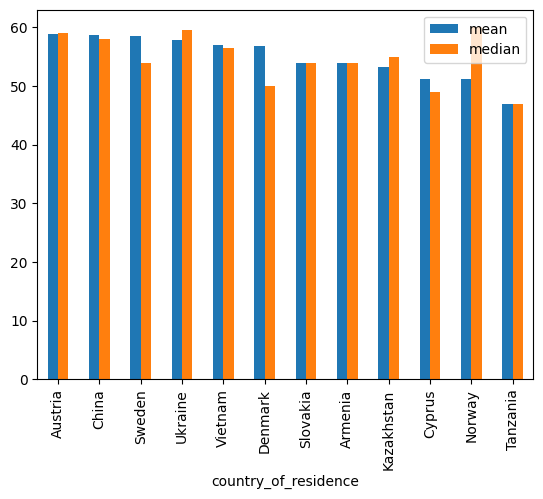

In [161]:
where = data.groupby('country_of_residence')['age'].agg(['mean', 'median']).sort_values(by='mean', ascending=False).tail(12)
where.plot(kind='bar')
where.tail(12)

#### Top 10 country have most billionaires
- United States	754
- China	515
- India	157
- Germany	102
- United Kingdom	82
- Russia	79
- Switzerland	78
- Hong Kong	67
- Italy	55
- Singapore	45


,count
country_of_residence,
United States,754
China,523
India,157
Germany,102
United Kingdom,82
Russia,79
Switzerland,78
Hong Kong,68
Italy,55


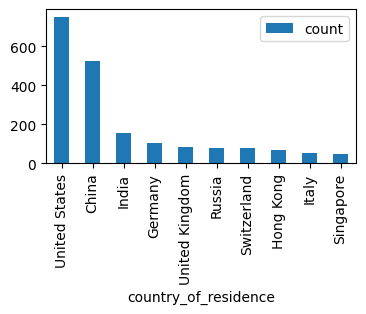

In [162]:
where = data.groupby('country_of_residence')['rank'].agg(['count']).sort_values(by='count', ascending=False).head(10)
where.plot(kind='bar', figsize=(4, 2))
where.head(10)

#### Top 10 country gather most wealth
- United States	4575100
- China	1805500
- India	628700
- France	499500
- Germany	462100
- Switzerland	409900
- United Kingdom	370700
- Russia	351000
- Hong Kong	321500
- Canada	173900

Top 5 có sự thay đổi, nhưng ta thấy quốc gia càng có nhiều tỷ phú thì cũng có nhiều wealth hơn


,sum
country_of_residence,
United States,4575100
China,1805500
India,628700
France,499500
Germany,462100
Switzerland,409900
United Kingdom,370700
Russia,351000
Hong Kong,321500


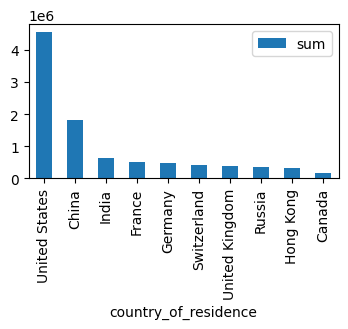

In [163]:
where = data.groupby('country_of_residence')['net_worth'].agg(['sum']).sort_values(by='sum', ascending=False).head(10)
where.plot(kind='bar', figsize=(4, 2))
where.head(10)

#### For India

top 3 industry have richest billionaires

,max
industries,
Diversified,83400
Technology,25600
Healthcare,22600


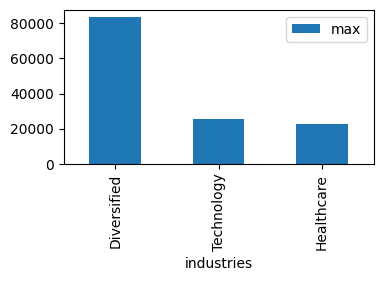

In [164]:
where = data[data['country_of_residence'] == 'India'].groupby('industries')['net_worth'].agg(['max']).sort_values(by='max', ascending=False).head(3)
where.plot(kind='bar', figsize=(4, 2))
where.head(3)

top 3 industry have most millionaires

,count
industries,
Manufacturing,32
Healthcare,29
Diversified,22


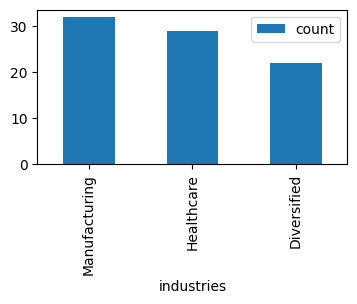

In [165]:
where = data[data['country_of_residence'] == 'India'].groupby('industries')['rank'].agg(['count']).sort_values(by='count', ascending=False).head(3)
where.plot(kind='bar', figsize=(4, 2))
where.head(3)

#### For China

top 3 industry have richest billionaires

,max
industries,
Food & Beverage,68000
Technology,45000
Automotive,33400


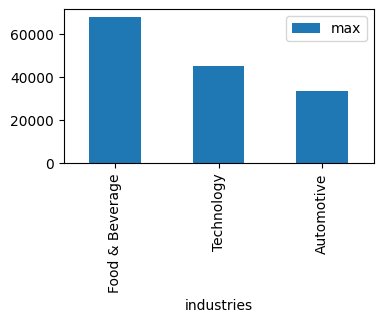

In [166]:
where = data[data['country_of_residence'] == 'China'].groupby('industries')['net_worth'].agg(['max']).sort_values(by='max', ascending=False).head(3)
where.plot(kind='bar', figsize=(4, 2))
where.head(3)

top 3 industry have most millionaires

,count
industries,
Manufacturing,143
Technology,78
Healthcare,72


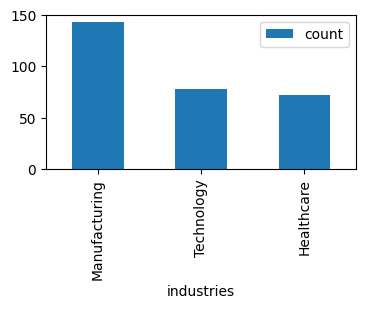

In [167]:
where = data[data['country_of_residence'] == 'China'].groupby('industries')['rank'].agg(['count']).sort_values(by='count', ascending=False).head(3)
where.plot(kind='bar', figsize=(4, 2))
where.head(3)

#### For United States	

top 3 industry have richest billionaires

,max
industries,
Automotive,180000
Technology,114000
Finance & Investments,106000


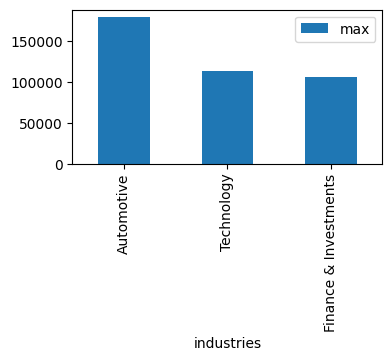

In [168]:
where = data[data['country_of_residence'] == 'United States'].groupby('industries')['net_worth'].agg(['max']).sort_values(by='max', ascending=False).head(3)
where.plot(kind='bar', figsize=(4, 2))
where.head(3)

top 3 industry have most millionaires

,count
industries,
Finance & Investments,190
Technology,141
Food & Beverage,74


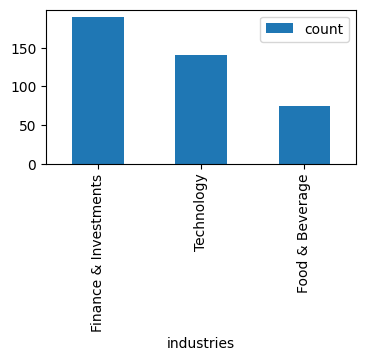

In [169]:
where = data[data['country_of_residence'] == 'United States'].groupby('industries')['rank'].agg(['count']).sort_values(by='count', ascending=False).head(3)
where.plot(kind='bar', figsize=(4, 2))
where.head(3)